**Author : Fazrin Muhammad**

Link Dashboard:

https://public.tableau.com/app/profile/fazrin.muhammad/viz/AutoMobileSalesData_M1_Fazrinmuh/Dashboard1?publish=yes

# **Indentifikasi Masalah**

**Topik Permasalahan**
<dl>Mengidentifikasi penjualan berdasarkan analisis produk unggulan, segmentasi pasar dari tiap negara, dan trend penjualan tiap tahun untuk menetapkan strategi yang dapat meningkatkan profitabilitas

**SMART**

- **S** (Specific) : Mengidentifikasi penjualan produk berdasarkan analisis produk unggulan, segmentasi pasar dari tiap negara, dan trend penjualan tiap tahun untuk menetapkan strategi yang dapat meningkatkan profitabilitas.
- **M** (Measurable) : Menetapkan target peningkatan persentase profitabilitas secara keseluruhan dengan mengukur kenaikan revenue sebesar 20% dari sebelumnya
- **A** (Achievable) : Dengan menganalisa faktor apa saja yang dapat mempengaruhi peningkatan penjualan produk akan sangat mungkin untuk menaikan revenue
- **R** (Relevant) : Meningkatkan penjualan akan dapat berpengaruh secara signifikan pada revenue 
- **T** (Time-bound) : Target tercapainya untuk waktu 1 tahun ke depan

**Problem Statement**

Mengidentifikasi penjualan produk berdasarkan analisa analisis produk unggulan, segmentasi pasar dari tiap negara, dan trend penjualan tiap tahun untuk dapat meningkatkan profitabilitas perusahaan dalam 1 tahun kedepan dengan tercapainya target revenue sebesar 20%


**Latar Belakang**

Sebagai seorang data analyst dalam sebuah perusahaan penjualan kendaraan di USA. Saya diperintahkan untuk menganalisa penjualan berdasarkan analisis produk unggulan, segmentasi pasar dari tiap negara, dan trend penjualan tiap tahun. Kemudian, mempresentasikan hasil analisa kepada top managment level. Hasil analisa berupa grafik yang dibuat menggunakan tablue untuk memudahkan audiens mengerti apa yang disampaikan. Diharapkan hasil analisa dapat membantu meningkatkan target revenue perusahaan sebesar 20% pada 1 tahun ke depan. 

**Penjabaran Masalah**

Penjabaran masalah dilakukan menggunakan metode 5W + 1H sebagai berikut:
- Produk apa yang paling laku terjual?
- Siapa customer yang paling banyak membeli?
- Negara mana saja yang paling banyak penjualannya?
- Kota mana saja yang paling banyak penjualannya?
- Kapan penjualan terbesar berdasarkan tahun dan bulannya?
- Apakah ada perbedaan penjualan antar negara?
- Apa ada perbedaan penjualan antar produk?


# **Data Loading**

Sumber data dapat dilihat pada link di bawah ini:
<dl> <a href="https://www.kaggle.com/datasets/ddosad/auto-sales-data/data">klik link disini</a>

**Dataset Overview**

- ORDERNUMBER   : This column represents the unique identification number assigned to each order.
- QUANTITYORDERED : It indicates the number of items ordered in each order.
- PRICEEACH : This column specifies the price of each item in the order.
- ORDERLINENUMBER :	It represents the line number of each item within an order.
- SALES : This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
- ORDERDATE : It denotes the date on which the order was placed.
- DAYS_SINCE_LASTORDER	: This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
- STATUS : It indicates the status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."
- PRODUCTLINE : This column specifies the product line categories to which each item belongs.
- MSRP : It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
- PRODUCTCODE : This column represents the unique code assigned to each product.
- CUSTOMERNAME : It denotes the name of the customer who placed the order.
- PHONE : This column contains the contact phone number for the customer.
- ADDRESSLINE1 : It represents the first line of the customer's address.
- CITY : This column specifies the city where the customer is located.
- POSTALCODE : It denotes the postal code or ZIP code associated with the customer's address.
- COUNTRY : This column indicates the country where the customer is located.
- CONTACTLASTNAME : It represents the last name of the contact person associated with the customer.
- CONTACTFIRSTNAME : This column denotes the first name of the contact person associated with the customer.
- DEALSIZE : It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."

In [1]:
# Import Libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from datetime import datetime
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\1257161305.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Memasukkan data tabel auto_sales_data.csv
df = pd.read_csv('auto_sales_data.csv')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [3]:
# Cek jumlah row, dan column
df.shape

(2747, 20)

In [4]:
# Cek label kolom
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

**Insight**
<dl>Melakukan loading file auto_sales_data.csv, tabel tersebut terdiri dari 2747 baris dan 20 kolom. Dimana kolom tersebut terdiri dari ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, DAYS_SINCE_LASTORDER, STATUS, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, CITY, POSTALCODE, COUNTRY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE. Selanjutnya untuk kolom yang memiliki nilai mata uang, asumsikan mata uang USD ($). Kemudian, eksplorasi data berikutnya yaitu cek summary data dari tabel. 

In [5]:
# Cek summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
# Cek missing value
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [7]:
# Cek duplikat data
df.duplicated().sum()

0

**Insight**
<dl>Dari hasil pengecekan summary data di atas terdapat informasi ada satu kolom yaitu ORDERDATE yang tidak sesuai tipe datanya, saat ini kolom tersebut masih bertipe object seharusnya bertipe datetime. Akan dilakukan perubahan pada langkah selanjutnya. Kemudian, dari informasi di atas juga tidak ditemukan missing value dan data duplikat pada tiap kolomnya.  Berikutnya akan dilakukan pengecekan isi dari tiap kolom untuk mengetahui apakah ada data yang tidak normal.

In [8]:
# Menampilkan list kolom STATEMENT
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [9]:
# Menampilkan list kolom PRODUCTLINE
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [10]:
# Menampilkan list kolom CITY
df['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'Burlingame', 'Lille',
       'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'San Diego', 'Bruxelles', 'Tsawassen',
       'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz', 'Makati City',
       'Marseille', 'Koln', 'Gensve', 'Reggio Emilia', 'Frankfurt',
       'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Glendale', 'Sevilla',
       'Brisbane', 'Strasbourg', 'Las Vegas', 'Oslo', 'Bergamo',
       'Glen Waverly', 'Munich', 'Charleroi'], dtype=object)

In [11]:
# Menampilkan list kolom COUNTRY
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [12]:
# Menampilkan list kolom DEAL SIZE
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

**Insight**
<dl>Setelah dilakukan pengecekan isi data ke beberapa kolom. Isi data terlihat normal, maksudnya tidak ada spasi sebelum atau sesudah kata, tidak ada simbol, dan sebagainya.

In [13]:
df['PRICEEACH'].unique()

array([95.7 , 81.35, 94.74, ..., 55.69, 97.16, 62.24])

# **Data Cleaning**

### Ganti Tipe Data

Sebelum mengganti tipe data pada kolom ORDERDATE, mari kita lihat pattern dari isi kolom tersebut untuk menentukan format tanggalnya.

In [14]:
# Cek isi kolom ORDERDATE
df['ORDERDATE'].unique()

array(['24/02/2018', '07/05/2018', '01/07/2018', '25/08/2018',
       '28/10/2018', '11/11/2018', '18/11/2018', '15/01/2019',
       '20/02/2019', '05/04/2019', '18/05/2019', '28/06/2019',
       '23/07/2019', '27/08/2019', '30/09/2019', '15/10/2019',
       '02/11/2019', '15/11/2019', '24/11/2019', '17/12/2019',
       '03/02/2020', '03/03/2020', '08/04/2020', '13/05/2020',
       '29/01/2018', '24/03/2018', '28/05/2018', '24/07/2018',
       '19/09/2018', '20/10/2018', '06/11/2018', '13/11/2018',
       '25/11/2018', '05/12/2018', '29/01/2019', '10/03/2019',
       '04/05/2019', '15/06/2019', '19/07/2019', '17/08/2019',
       '08/09/2019', '11/10/2019', '21/10/2019', '04/11/2019',
       '29/11/2019', '10/12/2019', '20/01/2020', '09/03/2020',
       '01/05/2020', '31/05/2020', '29/04/2018', '12/01/2019',
       '03/04/2019', '27/09/2019', '23/11/2019', '02/02/2020',
       '07/04/2020', '05/01/2020', '11/02/2018', '28/04/2018',
       '12/06/2018', '10/08/2018', '06/10/2018', '23/10

**Insight**
<dl>Dari data di atas pattern dari isi kolom ORDERDATE yaitu DD/MM/YYY. Selanjutnya lakukan penggantian tipe data pada kolom tersebut.

In [15]:
# Mengganti tipe data kolom ORDERDATE dengan urutan day/month/year
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')

# Cek summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [16]:
# Cek data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


**Insight**
<dl>Tipe data kolom ORDERDATE sudah diganti menjadi Datetime64.

### Drop Column

Selanjutnya drop kolom yang tidak digunakan untuk kebutuhan analisa dan visualisasi.

In [17]:
# Buat list kolom mana saja yang akan di drop
column_drop = ['ORDERNUMBER','PHONE','ADDRESSLINE1','CONTACTLASTNAME','CONTACTFIRSTNAME']

# drop kolom yang ada pada list di atas
df = df.drop(columns=column_drop,axis=1)

In [18]:
# Cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   QUANTITYORDERED       2747 non-null   int64         
 1   PRICEEACH             2747 non-null   float64       
 2   ORDERLINENUMBER       2747 non-null   int64         
 3   SALES                 2747 non-null   float64       
 4   ORDERDATE             2747 non-null   datetime64[ns]
 5   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  CITY                  2747 non-null   object        
 12  POSTALCODE            2747 non-null   object        
 13  COUNTRY           

In [19]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,10022,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,51100,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,75508,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,90003,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,94217,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Small
2743,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,90110,Finland,Medium
2744,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Medium
2745,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,31000,France,Small


**Insight**
<dl>Kolom ORDERNUMBER,DAYS_SINCE_LASTORDER,PHONE,ADDRESSLINE1,CONTACTLASTNAME,CONTACTFIRSTNAME sudah berhasil di drop.

### Numerical Data and Categorical Data

Selanjutnya cek kolom mana saja yang numerical dan kategorical untuk dapat membantu proses analisa.

In [20]:
# Cek kolom numerical pada data
df_num = df.select_dtypes(include=['int64','float64'])

# Cek kolom kategorical pada data
df_cat = df.select_dtypes(include=['object'])

print(df_num.columns, len(list(df_num.columns.values)))
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object') 6
Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


**Insight**
<dl>Kolom numerical terdiri dari 6 kolom yaitu  QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, MSRP, DAYS_SINCE_LASTORDER_NEW. kemudian untuk kolom kategorical terdiri dari 8 kolom yaitu STATUS, PRODUCTLINE, PRODUCTCODE, CUSTOMERNAME, CITY, POSTALCODE, COUNTRY, DEALSIZE.

# **Analisis dan Perhitungan**

### Central Tendency Analysis

Melakukan analisa pada kolom numerical

In [21]:
# Cek mean, median, std deviasi, min, max, q1, q2, q3 pada kolom numerical
display(round(df_num.describe(),2))

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.00,2747.00,2747.00,2747.00,2747.00,2747.00
mean,35.10,101.10,6.49,3553.05,1757.09,100.69
std,9.76,42.04,4.23,1838.95,819.28,40.11
min,6.00,26.88,1.00,482.13,42.00,33.00
25%,27.00,68.74,3.00,2204.35,1077.00,68.00
50%,35.00,95.55,6.00,3184.80,1761.00,99.00
75%,43.00,127.10,9.00,4503.09,2436.50,124.00
max,97.00,252.87,18.00,14082.80,3562.00,214.00


In [22]:
# Cek nilai modus pada kolom numerical
quantityordered_modus = df['QUANTITYORDERED'].mode()[0]
priceeach_modus = df['PRICEEACH'].mode()[0]
orderlinenumber_modus = df['ORDERLINENUMBER'].mode()[0]
sales_modus = df['SALES'].mode()[0]
dayssincelastorder_modus = df['DAYS_SINCE_LASTORDER'].mode()[0]
msrp_modus = df['MSRP'].mode()[0]

# Menampilkan hasil
print(f'modus quantity ordered: {quantityordered_modus}')
print(f'modus price each: {priceeach_modus}')
print(f'modus order line number: {orderlinenumber_modus}')
print(f'modus sales: {sales_modus}')
print(f'modus days since last order: {dayssincelastorder_modus}')
print(f'modus MSRP: {msrp_modus}')

modus quantity ordered: 34
modus price each: 59.87
modus order line number: 1
modus sales: 1030.44
modus days since last order: 2207
modus MSRP: 118


**Kesimpulan Analisa**
1. Pada kolom quantity ordered, rata-rata customer order sekitar 35 orderan. Dengan minimum 6 orderan dan maximum 97 orderan. Dilihat pada nilai std. deviasi distribusi quantity order  juga tidak memiliki variansi yang banyak cenderung terkonsentrasi pada nilai rata-rata. 
2. Pada kolom price each, rata-rata harga per item sekitar $101. Dengan minimum harga per item $26,68 dan maximum $252,87. 
3. Pada kolom order line number, jumlah line order yaitu 1 sampai 18. Dan yang paling banyak digunakan yaitu line order nomor 1 (dilihat pada nilai modus).
4. Pada kolom sales, rata-rata penjualan sekitar $3.553. Dengan minimum harga $482,13 dan maximum $14.082,80. 
5. Pada kolom days_since_lastorder, rata-rata hari sejak customer order terkahir yaitu sekitar 1757 hari atau sekitar 4,8 tahun. Dengan minimum 42 hari dan maximum 3562 hari.
6. Pada kolom MSRP, rata-rata MSRP sekitar $100.69. Dengan minimum harga $33 dan maximum $214.  

### Distribution Analysis

Melihat distribusi pada quantity ordered

quantity ordered skewness: 0.37
quantity ordered kurtosis: 0.44


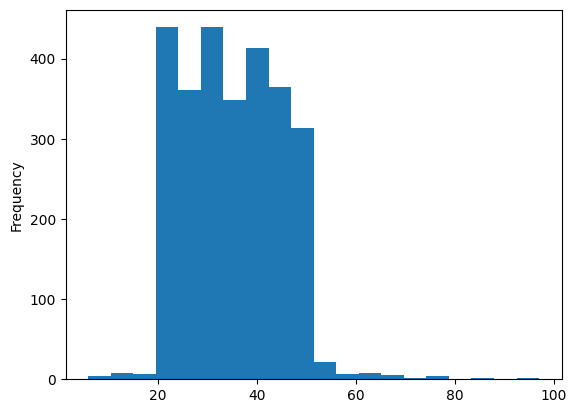

In [23]:
# Cek histogram quantity ordered
df['QUANTITYORDERED'].plot(kind='hist',bins=20)

# Cek skewness dan kurtosis quantity ordered
quantityordered_skew = df['QUANTITYORDERED'].skew()
quantityordered_kurto = df['QUANTITYORDERED'].kurtosis()

# Menampilkan hasil 
print(f'quantity ordered skewness: {round(quantityordered_skew,2)}')
print(f'quantity ordered kurtosis: {round(quantityordered_kurto,2)}')

Melihat distribusi pada price each

price each skewness: 0.7
price each kurtosis: 0.23


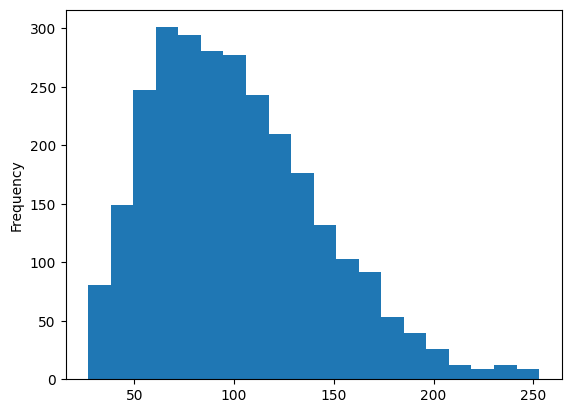

In [24]:
# Cek histogram price each
df['PRICEEACH'].plot(kind='hist',bins=20)

# Cek skewness dan kurtosis price each
priceeach_skew = df['PRICEEACH'].skew()
priceeach_kurto = df['PRICEEACH'].kurtosis()

# Menampilkan hasil 
print(f'price each skewness: {round(priceeach_skew,2)}')
print(f'price each kurtosis: {round(priceeach_kurto,2)}')

Melihat distribusi pada sales

sales skewness: 1.16
sales kurtosis: 1.77


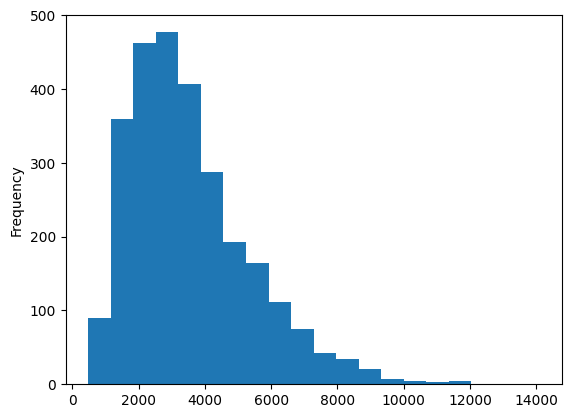

In [25]:
# Cek histogram sales
df['SALES'].plot(kind='hist',bins=20)

# Cek skewness dan kurtosis sales
sales_skew = df['SALES'].skew()
sales_kurto = df['SALES'].kurtosis()

# Menampilkan hasil 
print(f'sales skewness: {round(sales_skew,2)}')
print(f'sales kurtosis: {round(sales_kurto,2)}')

Melihat distribusi pada MSRP

MRSP skewness: 0.58
MRSP kurtosis: -0.14


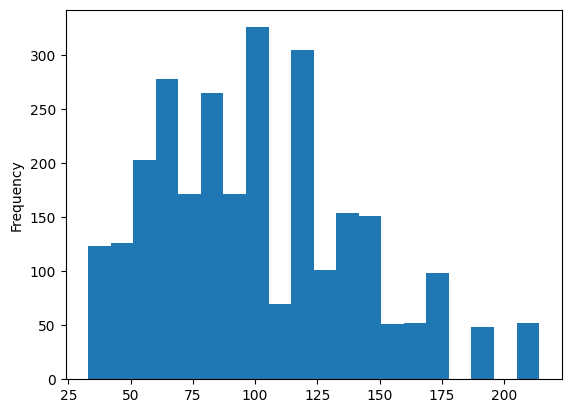

In [26]:
# Cek histogram MRSP
df['MSRP'].plot(kind='hist',bins=20)

# Cek skewness dan kurtosis MRSP
msrp_skew = df['MSRP'].skew()
msrp_kurto = df['MSRP'].kurtosis()

# Menampilkan hasil 
print(f'MRSP skewness: {round(msrp_skew,2)}')
print(f'MRSP kurtosis: {round(msrp_kurto,2)}')

**Kesimpulan Analisa**
1. Pada kolom quantity ordered, nilai skewness 0,37 dan nilai kurtosis: 0,44. Nilai skewness berada diantara -0,5 sampai 0,5 artinya data masih dapat dikatakan terdistribusi normal. Nilai kurtosis lebih dari 0 bisa disebut leptokurtic artinya data memiliki puncak yang lebih tinggi dibanding distribusi normal.
2. Pada kolom price each, nilai skewness 0,7 dan nilai kurtosis 0,23. Nilai skewness berada diantara 0,5 sampai 1 artinya moderat skew dimana sebaran data cenderung lebih panjang ke sebelah kanan tetapi tidak terlalu signifikan. Nilai kurtosis sedikit lebih dari 0 artinya data memiliki puncak yang lebih landai hampir mendekati distribusi normal
3. Pada kolom sales, nilai skewness 1,16 dan nilai kurtosis 1,77. Nilai skewness berada lebih dari 1 artinya positif skew dimana sebaran data lebih banyak di kiri dan terdapat buntut di sebelah kanan. Nilai kurtosis lebih dari 0 bisa disebut leptokurtic artinya data memiliki puncak yang lebih tinggi dari distribusi normal
4. Pada kolom MSRP, nilai skewness 0,58 dan nilai kurtosis -0,14. Nilai skewness berada diantara 0,5 sampai 1 artinya moderat skew dimana sebaran data cenderung lebih panjang ke sebelah kanan tetapi tidak terlalu signifikan. Nilai kurtosis kurang dari 0 atau negatif artinya sebaran data tidak memiliki bentuk puncak yang ekstrem.

### Outlier Analysis

Melihat kemungkinan adanya outlier pada data numerical setelah melihat nilai skewness sebelumnya.

Cek kolom price each, sales dan MSRP menggunakan Tukey's Rule dikarenakan masing-masing kolom memiliki nilai skewness > 0,5

In [27]:
# Cek kolom price each
priceeach_q1 = df['PRICEEACH'].quantile(0.25)
priceeach_q3 = df['PRICEEACH'].quantile(0.75)
priceeach_iqr = priceeach_q3-priceeach_q1

priceeach_up_bound = priceeach_q3 + 1.5*priceeach_iqr
priceeach_low_bound = priceeach_q1 - 1.5*priceeach_iqr

# Cek kolom sales
sales_q1 = df['SALES'].quantile(0.25)
sales_q3 = df['SALES'].quantile(0.75)
sales_iqr = sales_q3-sales_q1

sales_up_bound = sales_q3 + 1.5*sales_iqr
sales_low_bound = sales_q1 - 1.5*sales_iqr

# Cek kolom MSRP
msrp_q1 = df['MSRP'].quantile(0.25)
msrp_q3 = df['MSRP'].quantile(0.75)
msrp_iqr = msrp_q3-msrp_q1

msrp_up_bound = msrp_q3 + 1.5*msrp_iqr
msrp_low_bound = msrp_q1 - 1.5*msrp_iqr

# Menampilkan hasil
print(f'Price Each Upper Boundary: {priceeach_up_bound:.2f}' )
print(f'Price Each Lower Boundary: {priceeach_low_bound:.2f}')
print(f'Sales Upper Boundary: {sales_up_bound:.2f}' )
print(f'Sales Lower Boundary: {sales_low_bound:.2f}')
print(f'MSRP Upper Boundary: {msrp_up_bound:.2f}' )
print(f'MSRP Lower Boundary: {msrp_low_bound:.2f}')


Price Each Upper Boundary: 214.63
Price Each Lower Boundary: -18.79
Sales Upper Boundary: 7951.21
Sales Lower Boundary: -1243.77
MSRP Upper Boundary: 208.00
MSRP Lower Boundary: -16.00


In [28]:
# Cek persentasi outlier
priceeach_outlier = df['PRICEEACH'][(df['PRICEEACH']<priceeach_low_bound) | (df['PRICEEACH']>priceeach_up_bound)]
priceeach_no_outlier = df['PRICEEACH'][(df['PRICEEACH']>=priceeach_low_bound) & (df['PRICEEACH']<=priceeach_up_bound)]

sales_outlier = df['SALES'][(df['SALES']<sales_low_bound) | (df['SALES']>sales_up_bound)]
sales_no_outlier = df['SALES'][(df['SALES']>=sales_low_bound) & (df['SALES']<=sales_up_bound)]

msrp_outlier = df['MSRP'][(df['MSRP']<msrp_low_bound) | (df['MSRP']>msrp_up_bound)]
msrp_no_outlier = df['MSRP'][(df['MSRP']>=msrp_low_bound) & (df['MSRP']<=msrp_up_bound)]

# Menampilkan hasil
print(f'Price each percentage of outliers: {len(priceeach_outlier)*100/len(df["PRICEEACH"]):.2f}%%')
print(f'Sales percentage of outliers: {len(sales_outlier)*100/len(df["SALES"]):.2f}%%')
print(f'MSRP percentage of outliers: {len(msrp_outlier)*100/len(df["MSRP"]):.2f}%%')

Price each percentage of outliers: 1.20%%
Sales percentage of outliers: 2.88%%
MSRP percentage of outliers: 0.95%%


**Insight**
<dl>Hasil pengecekan outlier diketahui 2,88% pada kolom sales, 1,20% pada kolom price each, 0,95% pada kolom MSRP

### Sales by Product Line Analysis

Pertama, melakukan analisa penjualan (SALES) terhadap PRODUCTLINE.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\4073702954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_productline.index, y=sales_by_productline.values, palette='viridis')


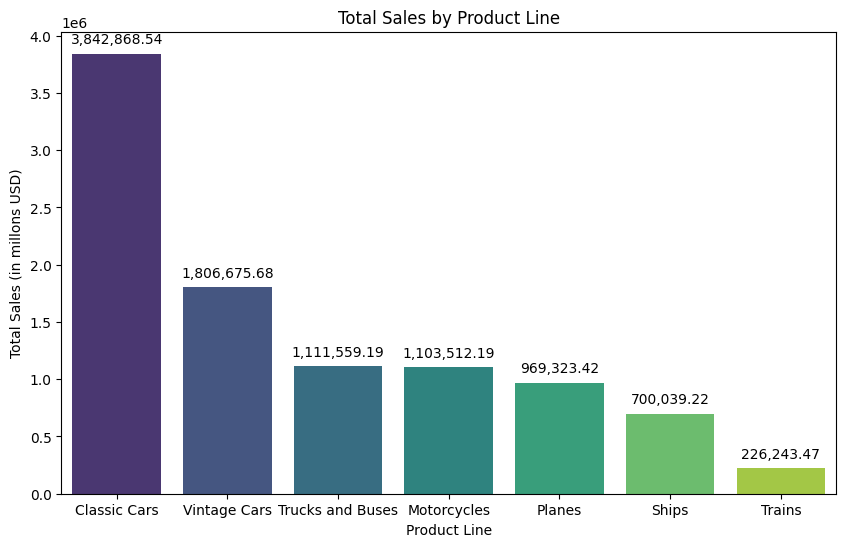

PRODUCTLINE
Classic Cars        3842868.54
Vintage Cars        1806675.68
Trucks and Buses    1111559.19
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Name: SALES, dtype: float64

In [29]:
# Melakukan pengelompokan dan aggregasi data
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Menampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_productline.index, y=sales_by_productline.values, palette='viridis')

# Menambahkan nilai pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (in millons USD)')
plt.show()

sales_by_productline

**Insight**
<dl>Berdasarkan analisa di atas, produk classic cars menjadi penjualan produk terbesar dengan $3.842.868. Kemudian vintage cars dengan $1.806.675 dan trucks and buses dengan $1.111.559. Sedangkan 3 produk dengan penjualan terendah yaitu trains, ships, dan planes.  

Selanjutnya, dari insight di atas mari kita analisa apakah penjualan classic cars jauh lebih besar dibanding produk lainnya secara statistika. Analisa akan dilakukan menggunakan annova analysis. Dimana:

H0 = Tidak ada perbedaan rata-rata penjualan yang signifikan antar produk line

H1 = Ada perbedaan rata-rata penjualan yang signifikan antar produk line

In [30]:
# Annova
classic_cars = df['SALES'][df['PRODUCTLINE']=='Classic Cars']
vitange_cars = df['SALES'][df['PRODUCTLINE']=='Vintage Cars']
motorcycles = df['SALES'][df['PRODUCTLINE']=='Motorcycles']
planes = df['SALES'][df['PRODUCTLINE']=='Planes']
trucks_Buses = df['SALES'][df['PRODUCTLINE']=='Trucks and Buses']
ships = df['SALES'][df['PRODUCTLINE']=='Ships']
trains = df['SALES'][df['PRODUCTLINE']=='Trains']

res = stats.f_oneway(classic_cars, vitange_cars, motorcycles, planes, trucks_Buses, ships, trains)
print('P-value:',res.pvalue)

P-value: 3.086515916055728e-29


**Insight**

Hasil uji annova memiliki nilai p-value < 0,05 artinya H0 ditolak. Dimana terdapat perbedaan rata-rata penjualan yang signifikan antar produk line. 

Selanjutnya melihat hubungan antara quantity order dengan product line.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\2835691175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=quantityordered_by_productline.index, y=quantityordered_by_productline.values, palette='viridis')


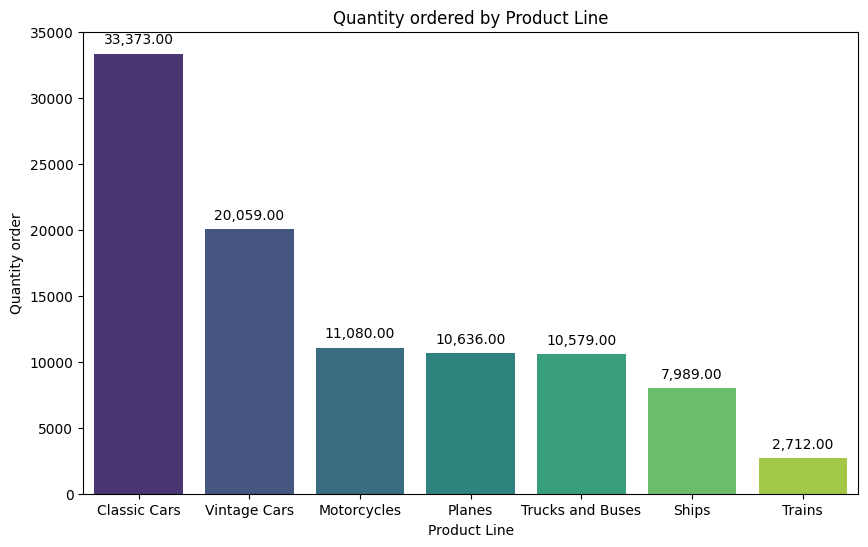

PRODUCTLINE
Classic Cars        33373
Vintage Cars        20059
Motorcycles         11080
Planes              10636
Trucks and Buses    10579
Ships                7989
Trains               2712
Name: QUANTITYORDERED, dtype: int64

In [31]:
# Melakukan pengelompokan dan aggregasi data
quantityordered_by_productline = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

# Menampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=quantityordered_by_productline.index, y=quantityordered_by_productline.values, palette='viridis')

# Menambahkan nilai pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Quantity ordered by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Quantity order')
plt.show()

quantityordered_by_productline

**Insight**
<dl>Dapat dilihat bahwa classic cars memang memiliki quantity order yang paling banyak, kemudian vintage cars diurutan kedua quantity order dan trains memang memiliki quantity order yang paling sedikit diantara product line lainnya. Perubahan terlihat pada motorcycles, planes dan trucks and buses.

**Kesimpulan Sales by Product Line Analysis**

Dari segi penjualan per produk, terdapat 4 produk unggulan yaitu classic cars, vintage cars, truck and buses dan motorcycles. Sedangkan 3 produk terendah yaitu planes, ship, dan train. Kembali pada problem statement diawal, dimana kita harus meningkatkan revenue perusahaan. Kita bisa mulai fokus untuk meningkatkan penjualan pada product `vintage cars`, `truck and buses`, dan `motorcycle`. Alasannya, karena 3 produk tersebut memeliki potensi dari segi quantity order nya. Classic cars dikecualikan karena dari segi penjualan dan quantity order sudah sangat tinggi.

Selanjutnya, menganalisa penjualan produk berdasarkan country. 

### Sales by Country Analysis

Berikutnya menganalisa penjualan berdasarkan negara.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\196024089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_sales_by_country.index, y=total_sales_by_country.values, palette='viridis')


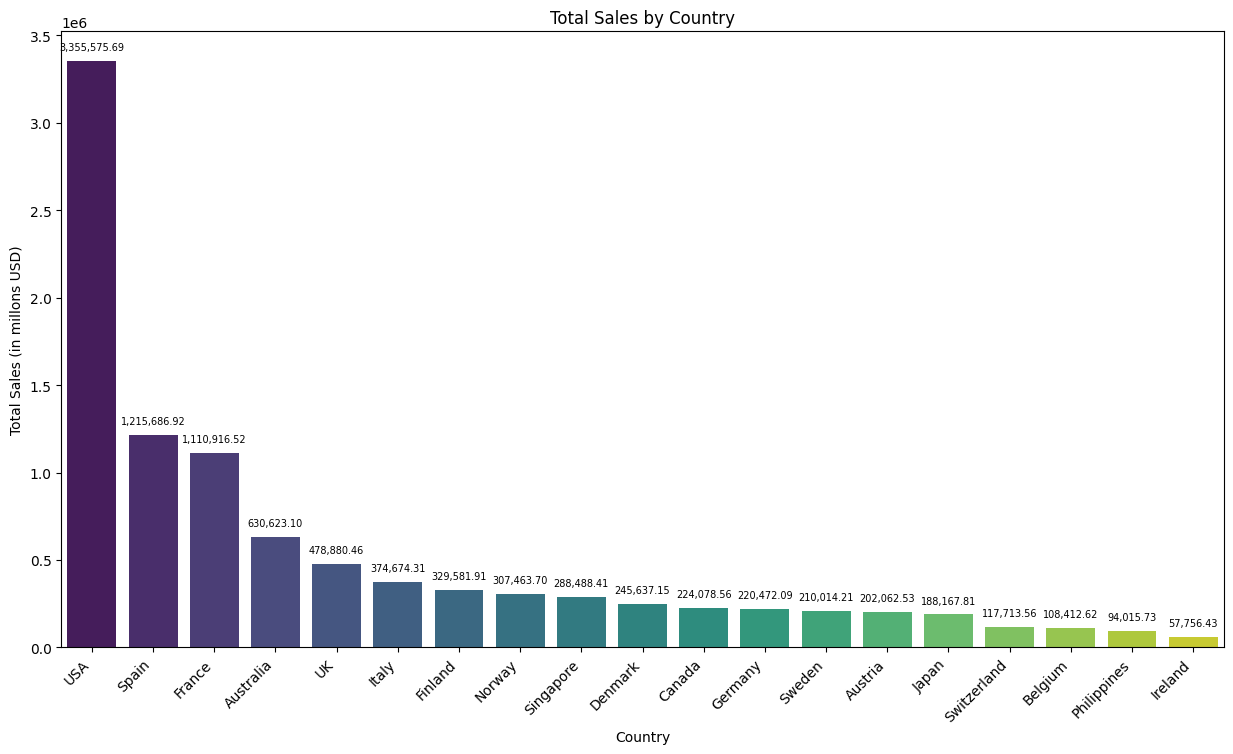

In [32]:
# Melakukan pengelompokan dan aggregasi data
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Menampilkan bar chart total penjualan per negara
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=total_sales_by_country.index, y=total_sales_by_country.values, palette='viridis')

# Menambahkan nilai total pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales (in millons USD)')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label negara agar lebih mudah dibaca
plt.show()

**Insight**

Dari hasil analisa dan visualisasi di atas. USA menjadi negara dengan penjualan tertinggi dengan $3.355.575. Kemudian Spain dengan $1.215.686 dan France $1.110.916. Terlihat perpedaan yang signifikan antara penjualan di USA dengan negara lainnya. Sedangkan untuk 3 terendah yaitu Ireland $57.756, Philippines $94.015 dan Belgium $108.412.

Untuk mengetahui apakah terdapat perbedaan penjualan antar negara? Mari buktikan dengan metode analisa Annova. Dengan asumsi:

H0 = tidak ada perbedaan rata-rata penjualan yang signifikan antara negara setidaknya dua kelompok.

H1 = ada perbedaan rata-rata penjualan yang signifikan antara negara setidaknya dua kelompok

In [33]:
# Memilih beberapa negara untuk dianalisis (gantilah dengan negara yang ingin Anda bandingkan)
selected_countries = ['USA', 'Spain', 'France', 'Australia', 'Germany']

# Menggabungkan data penjualan hanya untuk negara-negara yang dipilih
sales_by_country_selected = df[df['COUNTRY'].isin(selected_countries)]

# Melakukan uji ANOVA
anova_result = f_oneway(*[sales_by_country_selected[sales_by_country_selected['COUNTRY'] == country]['SALES'] for country in selected_countries])

# Menampilkan hasil uji ANOVA
print("Hasil ANOVA:")
print(anova_result)

Hasil ANOVA:
F_onewayResult(statistic=0.515217040021165, pvalue=0.7245708600137839)


**Insight**

Hasil dari analisa annova yaitu 0,51 dan p-value 0,72 artinya H0 gagal ditolak. Dengan begitu berdasarkan hasil analisa annova tidak ada perbedaan rata-rata penjualan yang signifikan antara negara setidaknya dua kelompok.


Selanjutnya menganalisa penjualan produk ditiap negara.

In [34]:
# Melakukan pengelompokan dan aggregasi data
top_product_by_country = df.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES'].max().reset_index()

# Menampilkan tabel dengan produk teratas untuk setiap negara
top_product_by_country

,COUNTRY,PRODUCTLINE,SALES
0,Australia,Classic Cars,8427.02
1,Australia,Motorcycles,9774.03
2,Australia,Planes,5001.92
3,Australia,Ships,3070.40
4,Australia,Trains,1681.35
...,...,...,...
111,USA,Planes,10066.60
112,USA,Ships,6960.48
113,USA,Trains,5808.48
114,USA,Trucks and Buses,8209.44


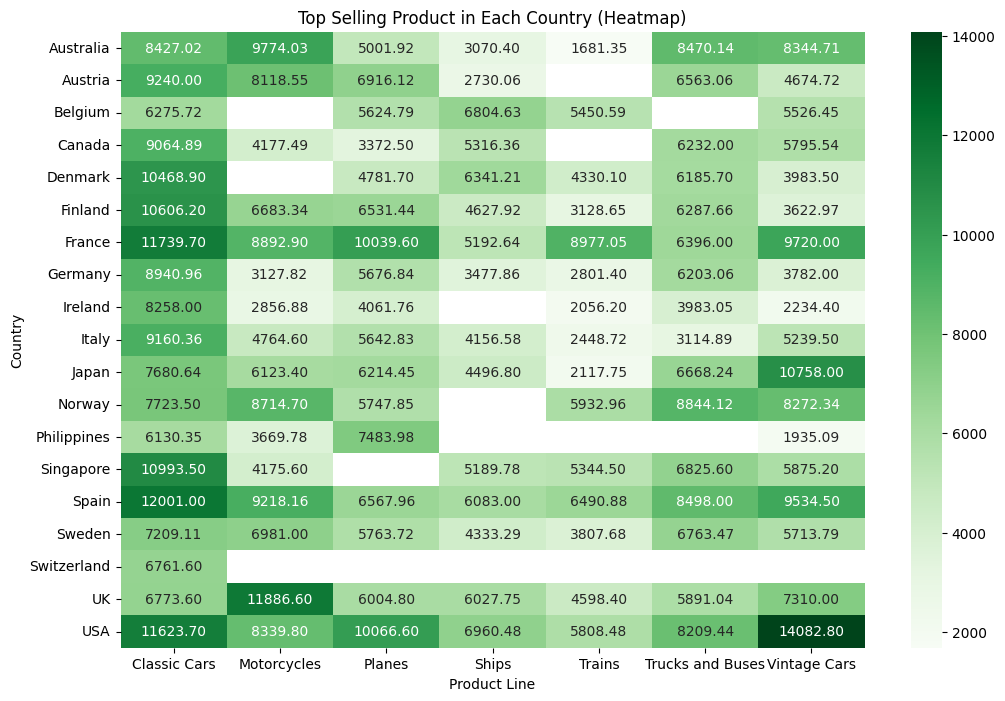

In [47]:
# Saring data hanya untuk kolom yang dibutuhkan
top_product_by_country_heatmap = top_product_by_country[['COUNTRY', 'PRODUCTLINE', 'SALES']]

# Buat pivot table untuk Heatmap
heatmap_data = top_product_by_country_heatmap.pivot_table(index='COUNTRY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt='.2f')
plt.title('Top Selling Product in Each Country (Heatmap)')
plt.xlabel('Product Line')
plt.ylabel('Country')
plt.show()

**Insight**

Berdasarkan visualisasi di atas classic cars sudah terjual ditiap negara dan hampir menjadi top 1 penjualan ditiap negara. Sedangkan untuk produk yang lain penjualan belum sampai ke semua negara.

Selanjutnya menentukan minimal penjualan tiap negara berdasarkan nilai rata-rata penjualan per product. Mari kita analisa berapa nilai rata-rata penjualan tiap produk

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\2998540057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_sales_by_productline.index, y=avg_sales_by_productline.values, palette='viridis')


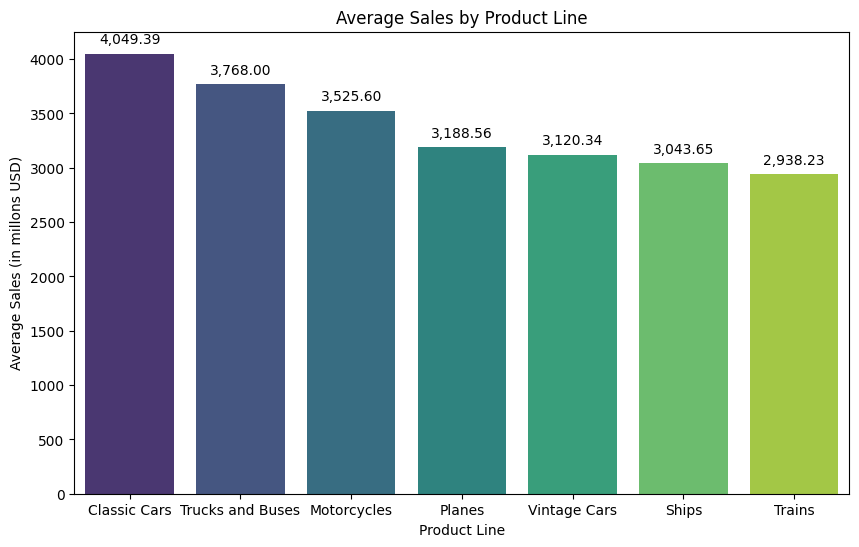

In [36]:
# Melakukan pengelompokan dan aggregasi data
avg_sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)

# Menampilkan bar chart rata-rata penjualan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_sales_by_productline.index, y=avg_sales_by_productline.values, palette='viridis')

# Menambahkan nilai rata-rata pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales (in millons USD)')
plt.show()

**Insight**

Dari nilai rata-rata penjualan tersebut kita bisa jadikan nilai target penjualan di tiap negara

**Kesimpulan Product Line by country Analysis**

Kembali ke problem statement, dimana pada kesimpulan sebelumnya terdapat 3 produk yang bisa kita optimalkan potensi penjualannya. 
- Pertama `vintage cars`, bisa mengoptimalkan penjualan di negara seperti Filipina, Irlandia, Germany karena penjualan masih terbilang di bawah nilai rata-rata penjualan vintage cars. Kemudian bisa membuka pasar baru di Switzerland karena belum ada penjualan. 
- Kedua `trucks and buses`, bisa mengoptimalkan penjualan di negara seperti Italy, Ireland, dan UK karena penjualan masih terbilang di bawah nilai rata-rata penjualan truck and buses. Kemudian bisa membuka pasar baru di Belgium, Filipina dan Switzerland karena belum ada penjualan. 
- Ketiga `motorcycles`, bisa mengoptimalkan penjualan di negara Ireland, Germany, Filipina, dan Singapore karena penjualan masih terbilang di bawah nilai rata-rata penjualan motorcycles. Kemudian bisa membuka pasar baru di Belgium, Denmark, dan Switzerland karena belum ada penjualan.

### Sales by City Analysis

Berikutnya analisa penjualan berdasarkan kota.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\240196973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_sales_by_city.values, y=total_sales_by_city.index, palette='viridis')


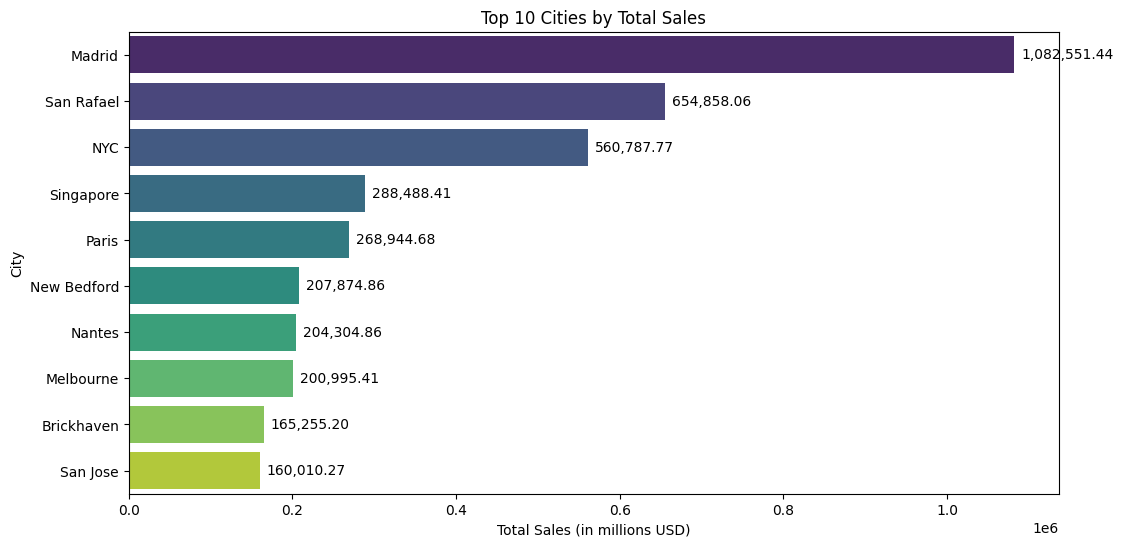

In [37]:
# Melakukan pengelompokan dan aggregasi data
total_sales_by_city = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)

# Menampilkan bar chart dengan nilai pada setiap bar
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_sales_by_city.values, y=total_sales_by_city.index, palette='viridis')

# Menambahkan nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales (in millions USD)')
plt.ylabel('City')
plt.show()

**Insight**

Pada visualisasi di atas dapat dilihat kota Madrid menjadi yang pertama dengan $1.082.551, berikutnya ada San Rafael dengan $654.858 dan NYC dengan $560.787. 

**Kesimpulan Analisis**

Pada analisa sales by country sebelumnya kita menemukan bahwa USA menempati peringkat pertama. Tetapi ketika menganalisa sales by city yang menempati peringkat pertama yaitu kota Madrid yang tidak berada di USA. Hal ini bisa disebabkan oleh fakta bahwa penjualan di suatu negara mungkin tidak merata di setiap kota.

### Sales by Time Analysis

Selanjutnya analisa penjualan berdasarkan waktu atau bisa dibilang menganalisa trend penjualannya. Berikut trend prenjualan tiap tahun.

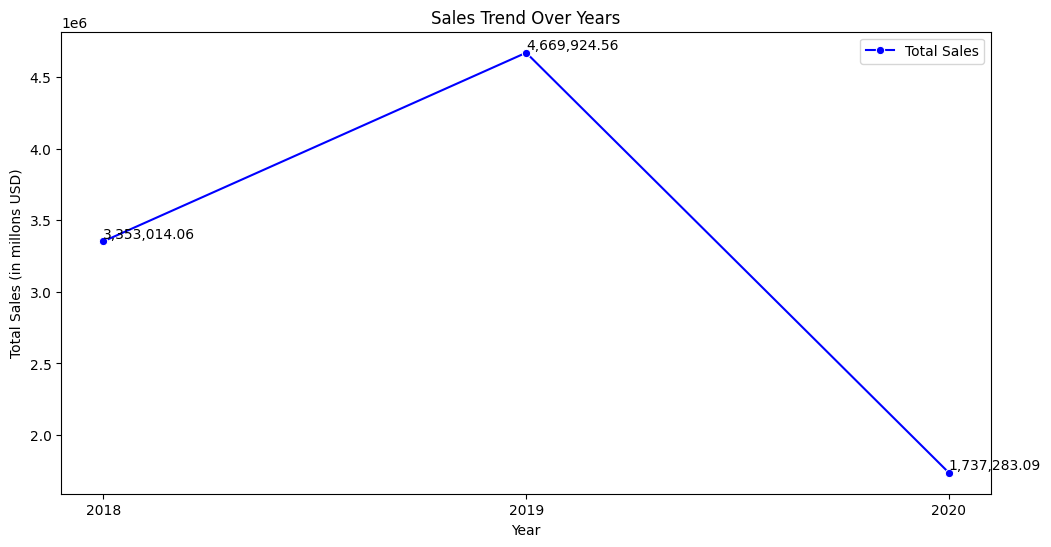

In [38]:
# Menambah kolom 'YEAR' untuk menyimpan informasi tahun dari 'ORDERDATE'
df['YEAR'] = df['ORDERDATE'].dt.year

# Melakukan pengelompokan dan aggregasi data
total_sales_by_year = df.groupby('YEAR')['SALES'].sum()

# Menampilkan line chart tren penjualan per tahun dengan label pada setiap titik
plt.figure(figsize=(12, 6))
sns.lineplot(x=total_sales_by_year.index, y=total_sales_by_year.values, marker='o', color='b', label='Total Sales')

# Menambahkan label pada setiap titik
for x, y in zip(total_sales_by_year.index, total_sales_by_year.values):
    plt.text(x, y, f'{y:,.2f}', ha='left', va='bottom')

plt.xticks([2018, 2019, 2020])  # Mengatur sumbu x hanya menampilkan tahun 2018, 2019, 2020
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millons USD)')
plt.legend()
plt.show()

**Insight**

Dari visualisasi di atas dapat dilihat bahwa terjadi kenaikan total penjualan dari tahun 2018 ke 2019. Sedangkan untuk tahun 2020 trend nya menurun karena data baru sampai bulan Mei 2020.

Selanjutnya melihat trend penjualan per bulan dari tiap tahun nya.

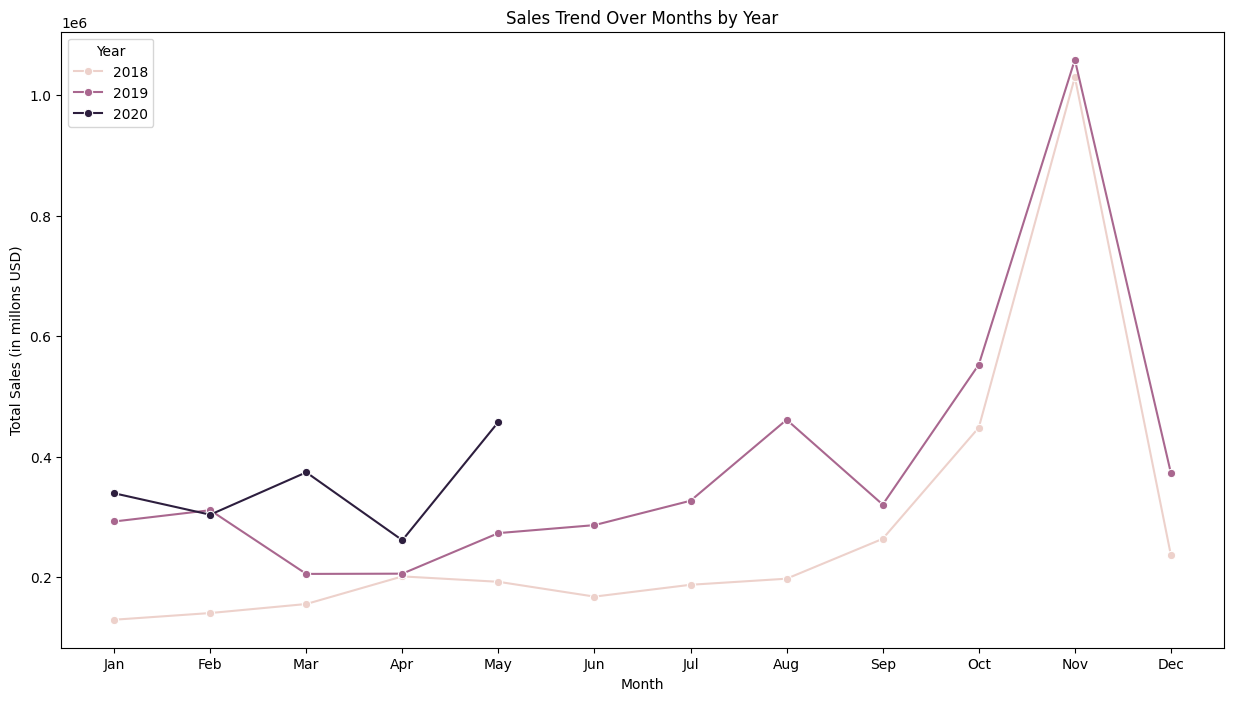

In [39]:
# Menambah kolom 'YEAR' dan 'MONTH' untuk menyimpan informasi tahun dan bulan dari 'ORDERDATE'
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month

# Melakukan pengelompokan dan aggregasi data
total_sales_by_year_month = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()

# Menampilkan line chart tren penjualan per bulan per tahun
plt.figure(figsize=(15, 8))
sns.lineplot(x='MONTH', y='SALES', hue='YEAR', data=total_sales_by_year_month, marker='o')

plt.title('Sales Trend Over Months by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millons USD)')
plt.legend(title='Year', loc='upper left')

# Menambahkan label pada sumbu x dan y
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

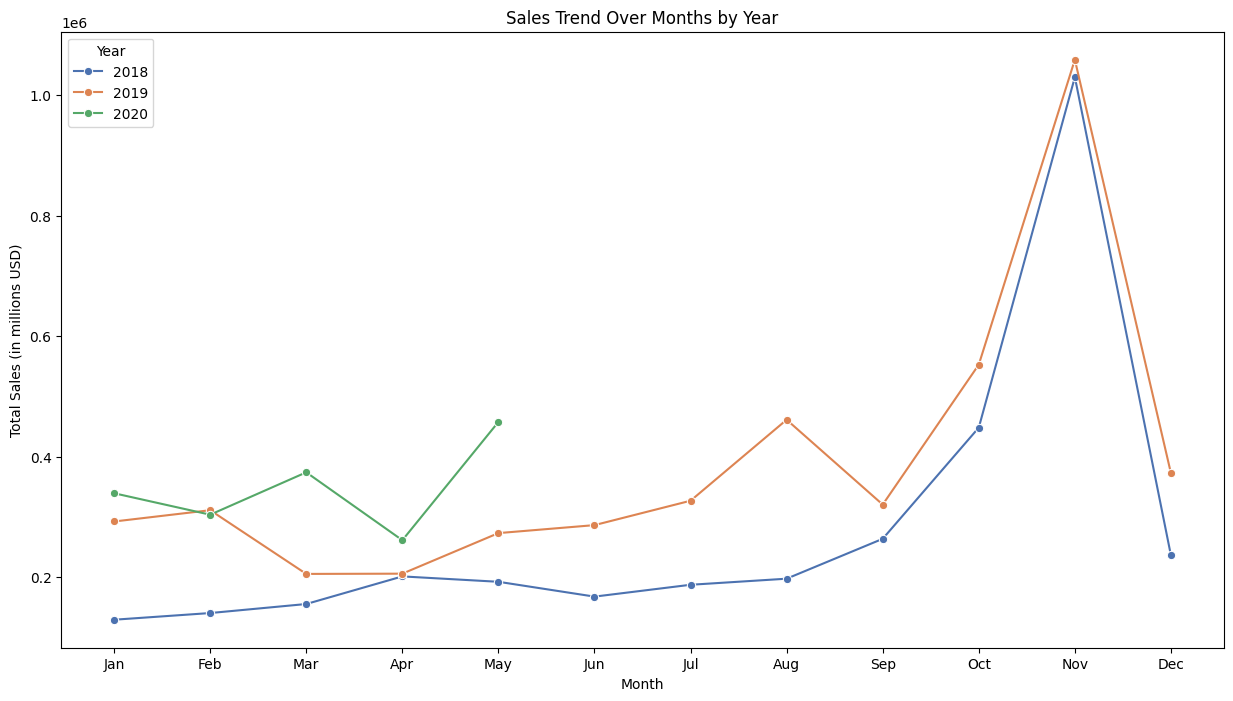

In [49]:
# Menampilkan line chart tren penjualan per bulan per tahun dengan warna yang berbeda
plt.figure(figsize=(15, 8))
sns.lineplot(x='MONTH', y='SALES', hue='YEAR', data=total_sales_by_year_month, marker='o', palette='husl')  # Menggunakan palet warna 'husl'

plt.title('Sales Trend Over Months by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions USD)')
plt.legend(title='Year', loc='upper left')

# Menambahkan label pada sumbu x dan y
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [40]:
monthly_sales_data = []

for year in df['YEAR'].unique():
    for month in range(1, 13):
        monthly_data = df[(df['YEAR'] == year) & (df['MONTH'] == month)]
        total_sales = monthly_data['SALES'].sum()
        date = f"{year}-{month:02d}"  # Format tanggal dan bulan
        monthly_sales_data.append({'Date': date, 'Total_Sales': total_sales})

# Membuat DataFrame
monthly_sales_df = pd.DataFrame(monthly_sales_data)
monthly_sales_df

,Date,Total_Sales
0,2018-01,129753.60
1,2018-02,140836.19
2,2018-03,155809.32
3,2018-04,201609.55
4,2018-05,192673.11
5,2018-06,168082.56
6,2018-07,187731.88
7,2018-08,197809.30
8,2018-09,263973.36
9,2018-10,448452.95


**Insight**

Dari visualiasi di atas, dapat kita lihat trend penjualan tiap bulan dari tahun 2018, 2019 dan 2020. Trend penjualan per bulan pada tahun 2018 dan 2019 hampir mirip dimana pada bulan januari hingga september mengalami trend naik tetapi tidak signifikan. Sedangkan pada bulan Oktober terjadi kenaikan yang cukup signifikan dan puncaknya pada bulan November bisa mencapai lebih dari $1.000.000 total penjualan. Namun, pada bulan Desember terjadi penurunan yang siginifikan.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\3730725487.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_by_product_year, x='YEAR', y='SALES', hue='PRODUCTLINE', marker='o', ci=None)


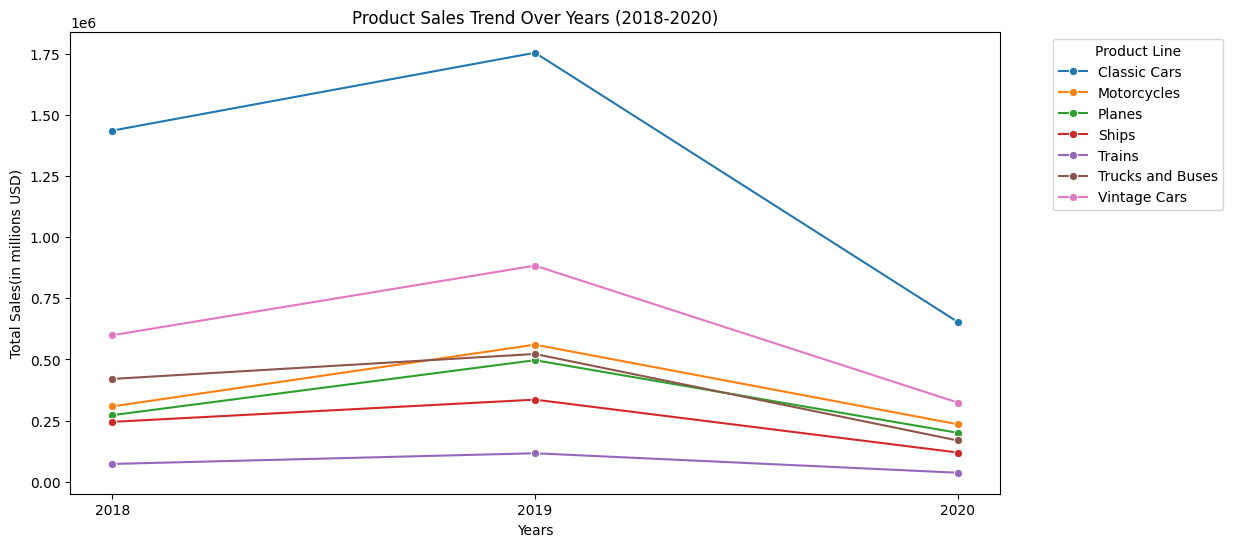

In [41]:
# Membuat DataFrame yang hanya berisi data untuk tahun 2018, 2019, dan 2020
selected_years = [2018, 2019, 2020]
df_selected_years = df[df['YEAR'].isin(selected_years)]

# Melakukan pengelompokan dan aggregasi data
sales_by_product_year = df_selected_years.groupby(['PRODUCTLINE', 'YEAR'])['SALES'].sum().reset_index()

# Menampilkan line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_product_year, x='YEAR', y='SALES', hue='PRODUCTLINE', marker='o', ci=None)
plt.title('Product Sales Trend Over Years (2018-2020)')
plt.xlabel('Years')
plt.ylabel('Total Sales(in millions USD)')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(selected_years)  # Menetapkan nilai sumbu x sesuai dengan tahun yang dipilih
plt.show()

In [42]:
# Mengonversi kolom 'ORDERDATE' menjadi tipe data datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Mengekstrak tahun dari kolom 'ORDERDATE'
df['Year'] = df['ORDERDATE'].dt.year

# Melakukan pengelompokan dan aggregasi data penjualan tiap tahun
sales_by_year_df = df.groupby(['Year', 'PRODUCTLINE'])['SALES'].sum().reset_index()
sales_by_year_df

,Year,PRODUCTLINE,SALES
0,2018,Classic Cars,1435572.13
1,2018,Motorcycles,308019.43
2,2018,Planes,272257.60
3,2018,Ships,244821.09
4,2018,Trains,72802.29
5,2018,Trucks and Buses,420429.93
6,2018,Vintage Cars,599111.59
7,2019,Classic Cars,1754056.17
8,2019,Motorcycles,560545.23
9,2019,Planes,496991.65


**Insight**

Dari analisa dan visualisasi di atas classic cars selalu menempati urutan pertama pada tahun 2018 dan 2019. Kemudian vintage cars diurutan kedua. Berikutnya ada motorcycle dan truck and buses yang sebagai peringkat ketiga dan keempat. Pattern dari produk penjualan tidak berubah tiap tahunnya.

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\1748873366.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_by_product_month_year, x='MONTH', y='SALES', hue='PRODUCTLINE', marker='o', ci=None)


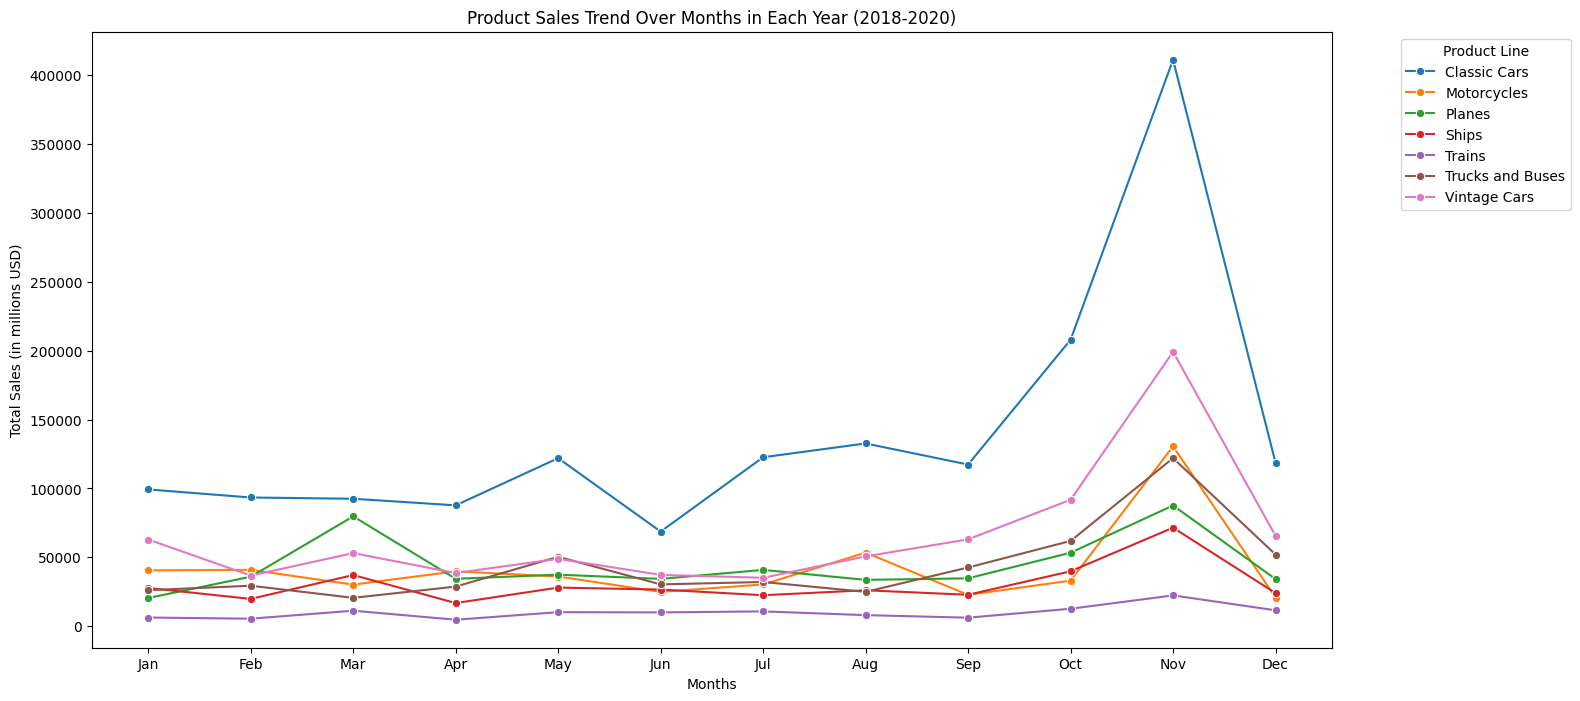

In [43]:
# Menambah kolom 'MONTH' untuk menyimpan informasi bulan dari 'ORDERDATE'
df['MONTH'] = df['ORDERDATE'].dt.month

# Membuat DataFrame yang hanya berisi data untuk tahun 2018, 2019, dan 2020
selected_years = [2018, 2019, 2020]
df_selected_years = df[df['YEAR'].isin(selected_years)]

# Melakukan pengelompokan dan aggregasi data
sales_by_product_month_year = df_selected_years.groupby(['PRODUCTLINE', 'YEAR', 'MONTH'])['SALES'].sum().reset_index()

# Menampilkan line chart
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_product_month_year, x='MONTH', y='SALES', hue='PRODUCTLINE', marker='o', ci=None)
plt.title('Product Sales Trend Over Months in Each Year (2018-2020)')
plt.xlabel('Months')
plt.ylabel('Total Sales (in millions USD)')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Insight**

Dari hasil visualisasi di atas, pada bulan oktober semua produk mengalami kenaikan penjualan dan bulan november merupakan puncak tertingginya dan ini berlangsung pada tahun 2018 dan 2019.

### Sales by Customer Name Analysis

Berikutnya menganalisa penjualan berdasarkan customer order. 

C:\Users\FAZRIN\AppData\Local\Temp\ipykernel_19612\2977186997.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_customer_sales.values, y=top_customer_sales.index, palette='viridis')


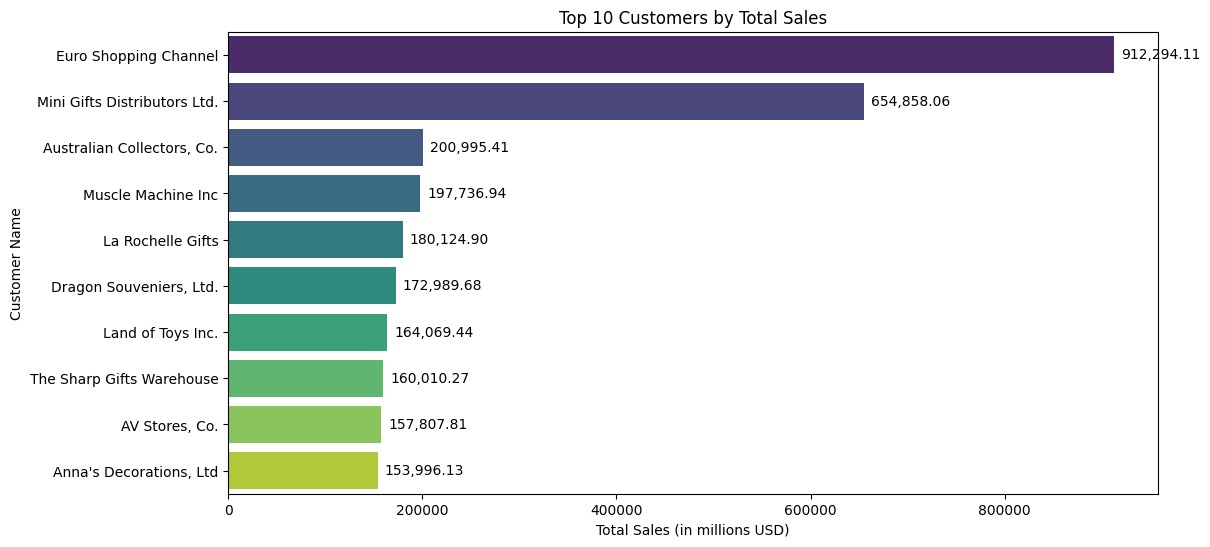

In [44]:
# Melakukan pengelompokan dan aggregasi data
top_customer_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

# Menampilkan bar chart dengan nilai di tiap bar
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_customer_sales.values, y=top_customer_sales.index, palette='viridis')

# Menambahkan nilai pada tiap bar
for bar, value in zip(bars.patches, top_customer_sales.values):
    bars.annotate(f'{value:,.2f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                  ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                  textcoords='offset points')

plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales (in millions USD)')
plt.ylabel('Customer Name')
plt.show()


**Insight**

Customer dengan pembelian terbesar yaitu Euro Shopping Channel dengan $912.294. Kemudian Mini Gifts Distribution Ltd. dengan $654.858 dan berikutnya Australian Collectors,Co. $200.995.

In [45]:
df.to_csv('auto_sales_data_clean.csv')

# Kesimpulan

Kesimpulan untuk menjawab penjabaran masalah yang sudah dibuat di awal

- Untuk produk yang paling unggulan berdasarkan penjualan terbesar yaitu Classic Cars, Vintage Cars, Truck & Buses, dan Motorcycle
- Customer yang paling banyak membeli yaitu Euro Shopping Channel dengan total pembelian $912.294
- USA menjadi negara sebagai penjualan terbesar
- Madrid menjadi kota sebagai penjualan terbesar
- Penjualan terbesar terjadi pada tahun 2019 (periode 2018-2020) dan untuk bulan November pada tahun 2018 dan 2019 selalu menjadi puncak penjualan tertinggi
- Berdasarkan uji hasil Annova menyatakan tidak ada perbedaan rata-rata penjualan yang signifikan antara negara setidaknya dua kelompok
- Berdasarkan uji hasil annova memiliki nilai p-value < 0,05 artinya H0 ditolak. Dimana terdapat perbedaan rata-rata penjualan yang signifikan antar produk line.

# Rekomendasi

- Mulai fokus pada penjualan vintage cars, motorcycles, dan truck and buses karena ketiga produk tersebut memiliki potensi untuk menaikan revenue perusahaan. Bisa melakukan promosi lebih banyak lagi untuk ketiga produk tersebut.
- Membuat promosi untuk meningkatkan penjualan di bulan Januari - September, karena hanya pada bulan oktober dan november yang memiliki kenaikan penjualan signifikan.
- Mengoptimalkan penjualan vintage cars di negara Filipina, Irlandia, dan Germany karena penjualan masih terbilang kurang atau di bawah rata-rata.
- Mengoptimalkan penjualan truck and buses di negara Italy, Irlandia, UK karena penjualan masih terbilang kurang atau di bawah rata-rata.
- Mengoptimalkan penjualan motorcycles di negara Irlandia, Germany, Filipina dan Singapore karena penjualan masih terbilang di bawah nilai rata-rata.